# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

nascvivos= pd.read_csv('b1abb33c4f.csv')

nascvivos = nascvivos[['ORIGEM','IDADEMAE','ESCMAE','QTDFILVIVO','QTDFILMORT','PESO','APGAR5','GESTACAO','SEXO','GRAVIDEZ']]

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [31]:
intervalos = [-1, 3, 5, 7, 10]
rotulos = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

# Criando a nova coluna 'Categoria_APGAR5' com base nos intervalos definidos
nascvivos['Categoria_APGAR5'] = pd.cut(nascvivos['APGAR5'], bins=intervalos, labels=rotulos)

# Mostrando as primeiras linhas do DataFrame com a nova coluna
print(nascvivos[['APGAR5', 'Categoria_APGAR5']].head())

   APGAR5 Categoria_APGAR5
0    10.0           normal
1     9.0           normal
2    10.0           normal
3    10.0           normal
4    10.0           normal


In [32]:
nascvivos['Categoria_APGAR5'].value_counts()

Categoria_APGAR5
normal              26463
asfixia leve          320
asfixia grave          74
asfixia moderada       68
Name: count, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

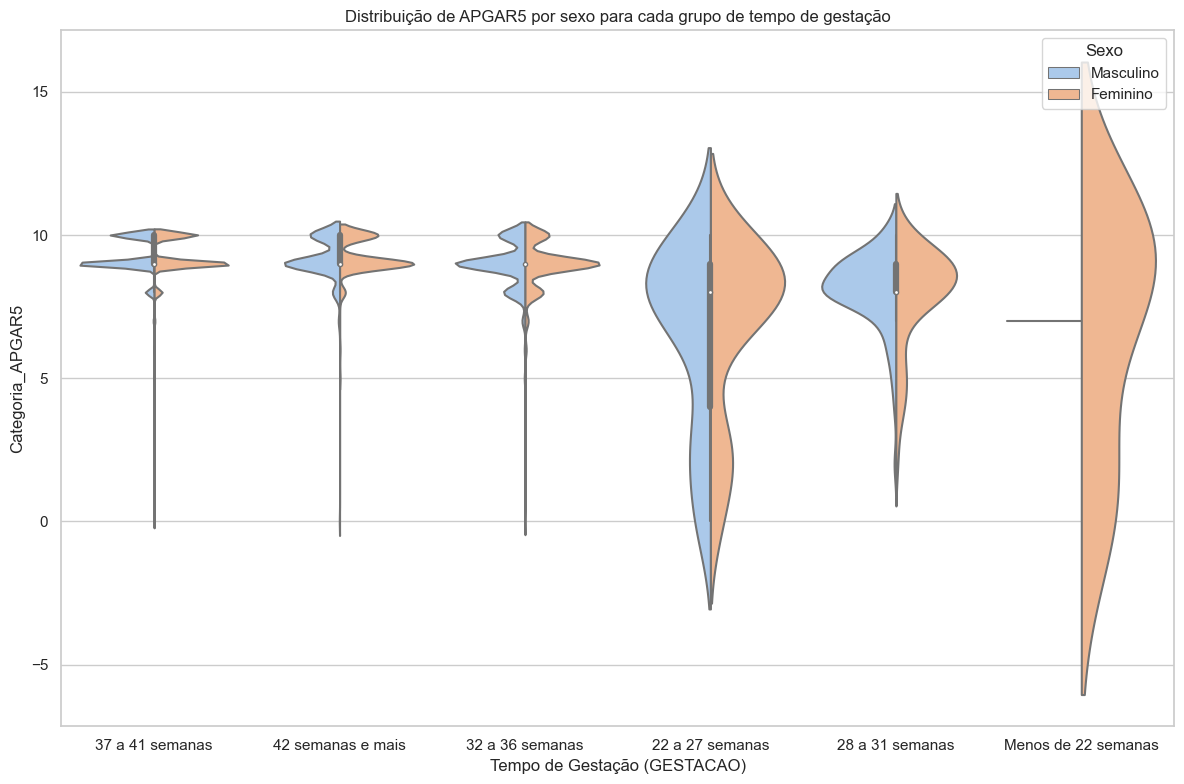

In [33]:
sns.set(style="whitegrid")

# Criando o gráfico de violino
plt.figure(figsize=(12, 8))
sns.violinplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=nascvivos, split=True, palette='pastel')
plt.title('Distribuição de APGAR5 por sexo para cada grupo de tempo de gestação')
plt.xlabel('Tempo de Gestação (GESTACAO)')
plt.ylabel('Categoria_APGAR5')
plt.legend(title='Sexo', loc='upper right')
plt.tight_layout()
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [34]:
tabela_cruzada = pd.crosstab(nascvivos['GESTACAO'], nascvivos['Categoria_APGAR5'])

print(tabela_cruzada)

Categoria_APGAR5     asfixia grave  asfixia moderada  asfixia leve  normal
GESTACAO                                                                  
22 a 27 semanas                 21                 1            12      51
28 a 31 semanas                  3                12            18     129
32 a 36 semanas                  8                19            73    2134
37 a 41 semanas                 33                28           196   22266
42 semanas e mais                1                 1             6     690
Menos de 22 semanas              2                 0             1       4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [35]:
tabela_cruzada_percentual = pd.crosstab(nascvivos['GESTACAO'], nascvivos['Categoria_APGAR5'], normalize='index') * 100

print(tabela_cruzada_percentual)

Categoria_APGAR5     asfixia grave  asfixia moderada  asfixia leve     normal
GESTACAO                                                                     
22 a 27 semanas          24.705882          1.176471     14.117647  60.000000
28 a 31 semanas           1.851852          7.407407     11.111111  79.629630
32 a 36 semanas           0.358102          0.850492      3.267681  95.523724
37 a 41 semanas           0.146517          0.124317      0.870222  98.858944
42 semanas e mais         0.143266          0.143266      0.859599  98.853868
Menos de 22 semanas      28.571429          0.000000     14.285714  57.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Figure size 1000x600 with 0 Axes>

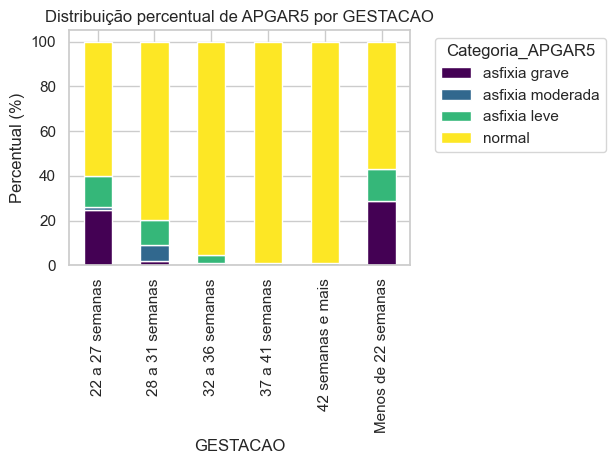

In [36]:
plt.figure(figsize=(10, 6))
tabela_cruzada_percentual.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Distribuição percentual de APGAR5 por GESTACAO')
plt.xlabel('GESTACAO')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=90)
plt.legend(title='Categoria_APGAR5', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

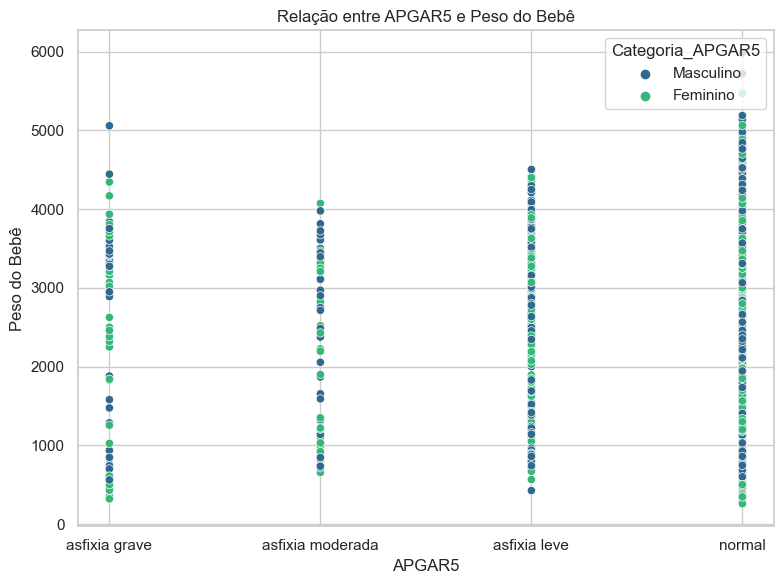

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Categoria_APGAR5', y='PESO', data=nascvivos, hue='SEXO', palette='viridis')
plt.title('Relação entre APGAR5 e Peso do Bebê')
plt.xlabel('APGAR5')
plt.ylabel('Peso do Bebê')
plt.legend(title='Categoria_APGAR5', loc='upper right')
plt.tight_layout()
plt.show()

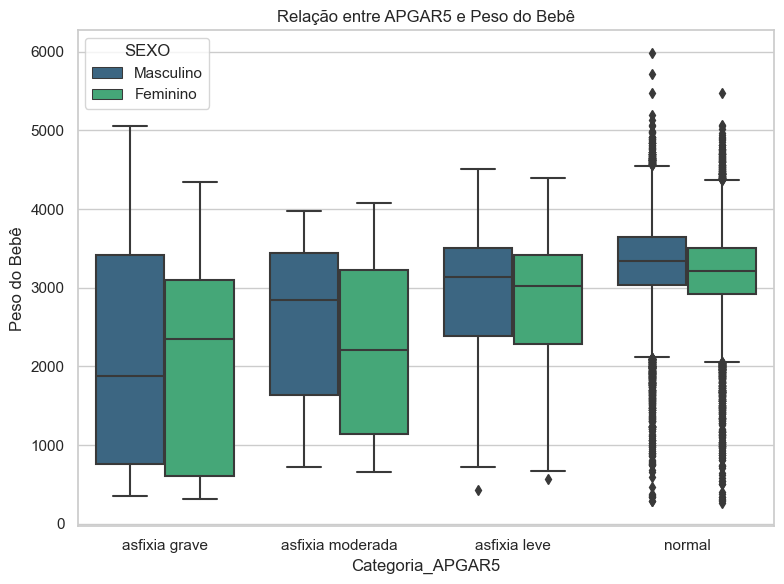

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Categoria_APGAR5', y='PESO', data=nascvivos, palette='viridis', hue='SEXO')
plt.title('Relação entre APGAR5 e Peso do Bebê')
plt.xlabel('Categoria_APGAR5')
plt.ylabel('Peso do Bebê')
plt.tight_layout()
plt.show()

C:\Users\edjun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


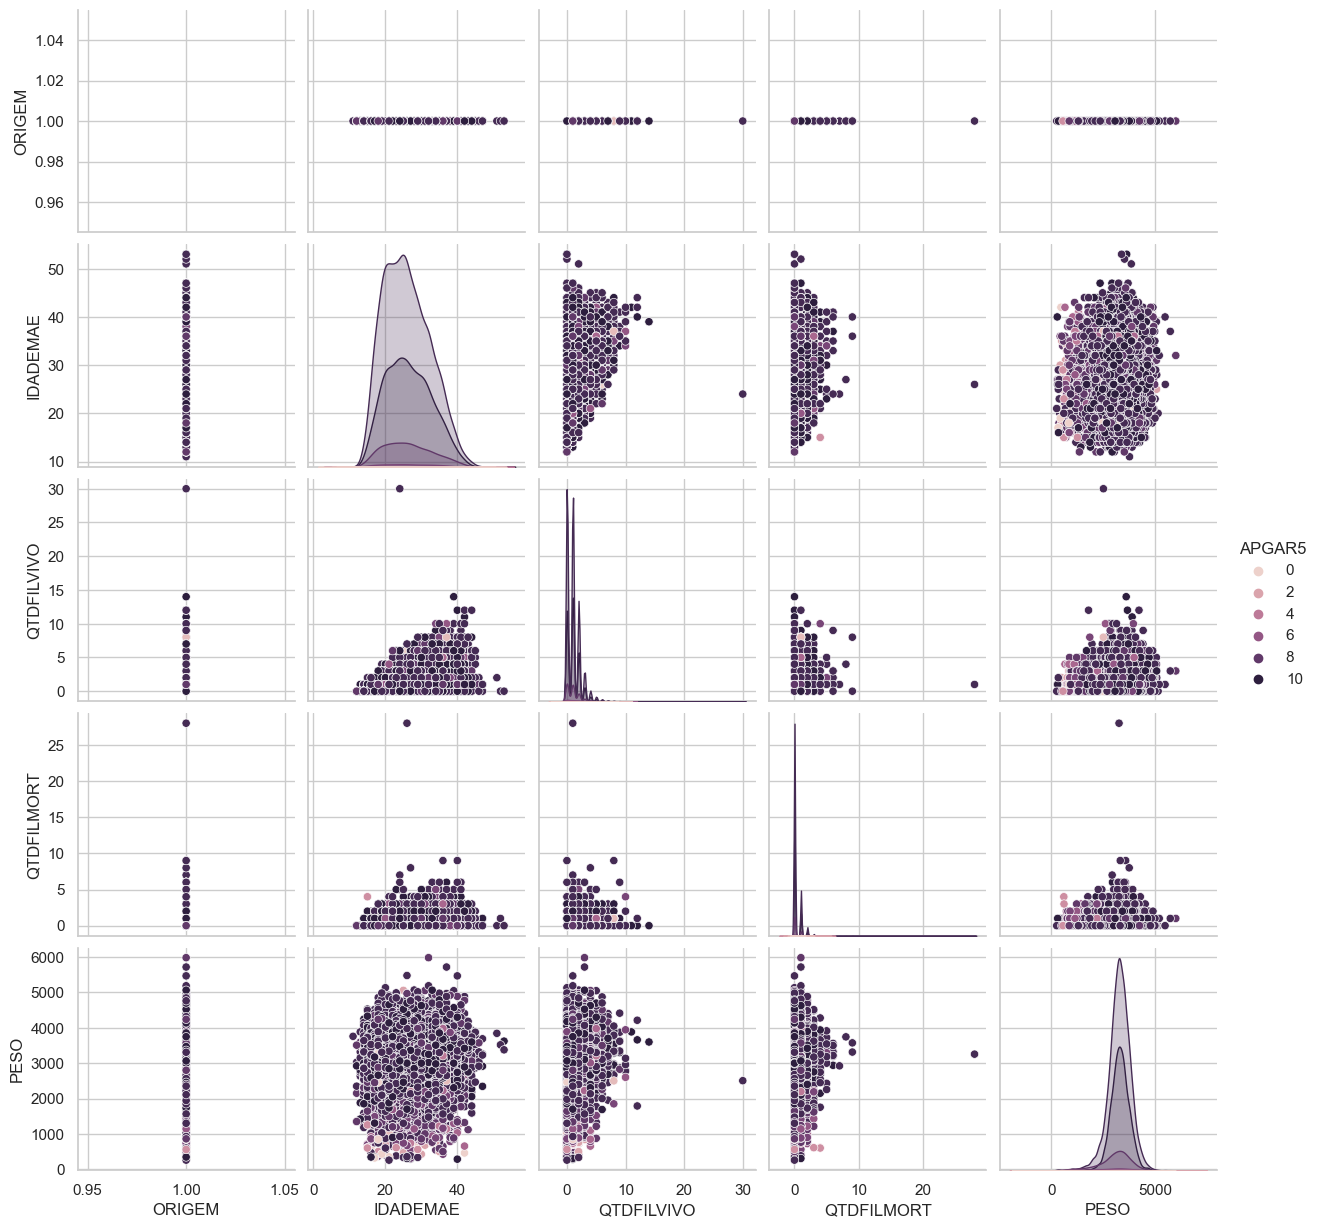

In [40]:
sns.pairplot(nascvivos, hue='APGAR5')

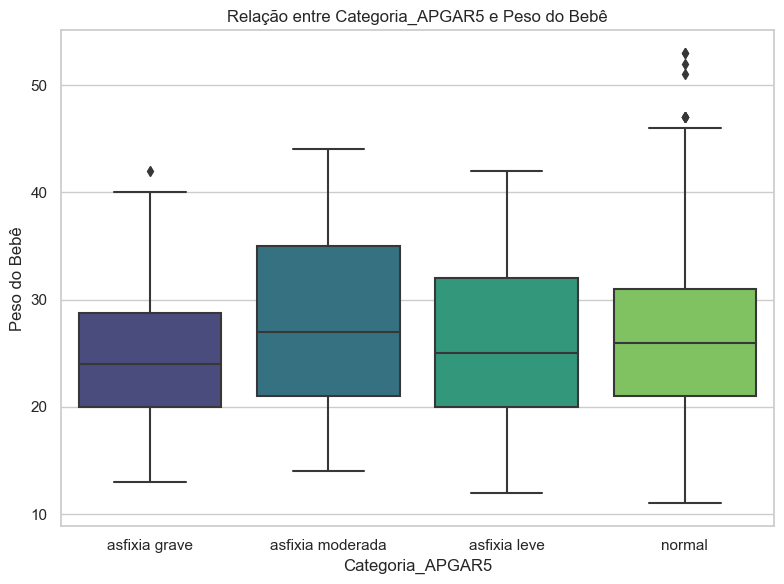

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Categoria_APGAR5', y='IDADEMAE', data=nascvivos, palette='viridis')
plt.title('Relação entre Categoria_APGAR5 e Peso do Bebê')
plt.xlabel('Categoria_APGAR5')
plt.ylabel('Peso do Bebê')
plt.tight_layout()
plt.show()

Não consegui identificar uma correlação muito clara, mas no gráfico boxplot entre a categoria do APGAR e o PESO, é possível ver a mediana do peso nas asfixias graves e moderadas, serem menores em relação a outras categorias.